In [38]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt

In [4]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p1-p2,2)))

In [5]:
p1=np.array([1,1])
p2=np.array([[4,4]])

In [6]:
distance(p1,p2)

4.242640687119285

In [18]:
def majority_vote(votes):
    vote_counts={}
    for vote in votes:
        #Known word
        if vote in vote_counts:
             vote_counts[vote]+=1
        else:
            vote_counts[vote]=1
    winners=[]
    max_count=max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count==max_count:
            winners.append(vote)
    return random.choice(winners)

In [33]:
def majority_vote_short(votes):
    mode,count = ss.mstats.mode(votes)
    return mode

In [29]:
votes=[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]

In [30]:
winner=majority_vote(votes)

In [31]:
winner

2

In [34]:
majority_vote_short(votes)

array([2.])

## kNN

In [63]:
def find_nearest_neighbors(p,points,k=5):
    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k]

In [64]:
def knn_predict(p,points,outcome,k=5):
    ind=find_nearest_neighbors(p,points,k)
    return majority_vote(outcome[ind])

In [41]:
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [42]:
p=np.array([2.7,1.7])

(0.5, 3.5, 0.5, 3.5)

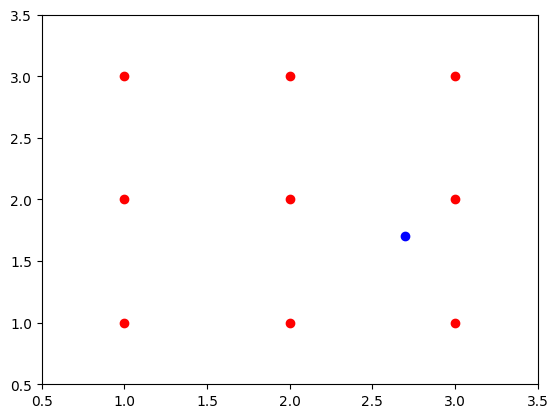

In [44]:
plt.plot(points[:,0], points[:,1],"ro")
plt.plot(p[0], p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [65]:
outcomes=np.array([0,0,0,0,0,1,1,1,1])

In [66]:
len(outcomes)

9

In [68]:
knn_predict(p,points,outcomes,k=2)

1

In [71]:
np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)

array([[-0.26642355,  0.2337587 ],
       [ 0.29820251, -1.81764173],
       [-1.42853652,  1.78960718],
       [-1.4290383 ,  0.13817434],
       [ 0.04130788,  2.20140194],
       [ 1.50680719,  0.24037962],
       [-0.46727963, -0.20105965],
       [ 0.94543577,  1.59677229],
       [ 1.12095228, -0.60049103],
       [ 1.11819867, -0.4979667 ]])

In [74]:
outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [76]:
n=20

In [75]:
def generate_synth_data(n=50):
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

In [78]:
(points,outcomes)=generate_synth_data(n)

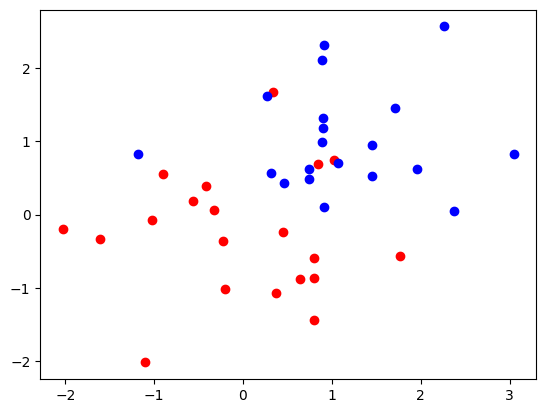

In [80]:
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")
plt.savefig("data_point.png")

### prediction_grid

In [99]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    (x_min,x_max,y_min,y_max)=limits
    xs=np.arange(x_min,x_max, h)
    ys=np.arange(y_min,y_max, h)
    xx,yy=np.meshgrid(xs,ys)
    
    predition_grid=np.zeros(xx.shape,dtype=int)
    
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p=np.array([x,y])
            predition_grid[j,i]=knn_predict(p,predictors,outcomes,k)
    return (xx,yy,predition_grid)

In [102]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [90]:
(predictors,outcomes)= generate_synth_data()

In [91]:
k=5; filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1

In [100]:
(xx,yy,prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)

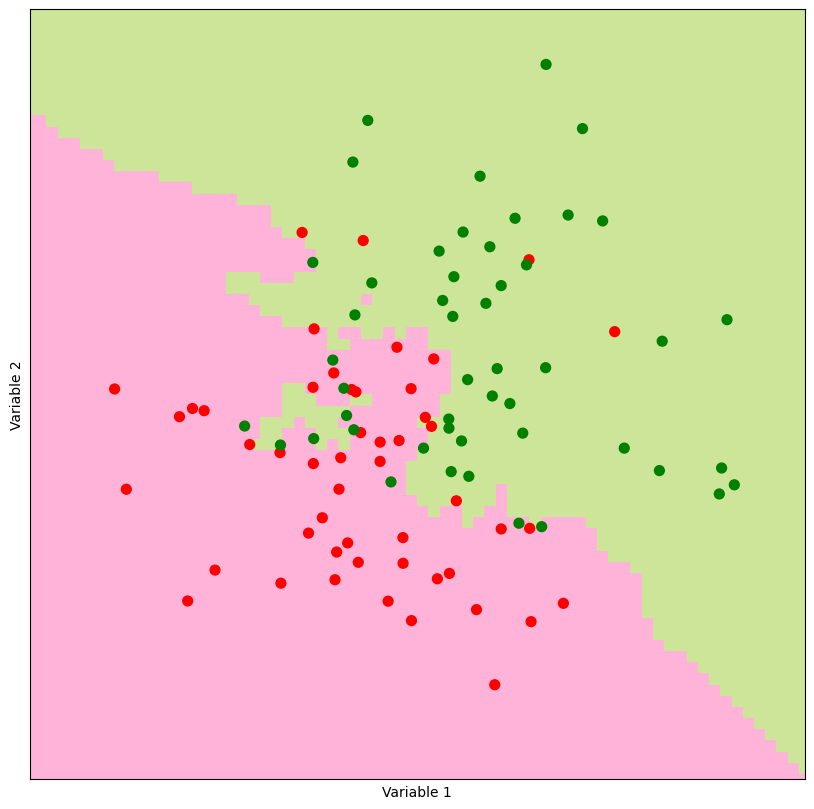

In [103]:
plot_prediction_grid(xx,yy,prediction_grid,filename)

### kNN Library

In [105]:
from sklearn import datasets

In [106]:
iris=datasets.load_iris()

In [107]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [116]:
predictors=iris.data[:,0:2]
outcomes=iris.target

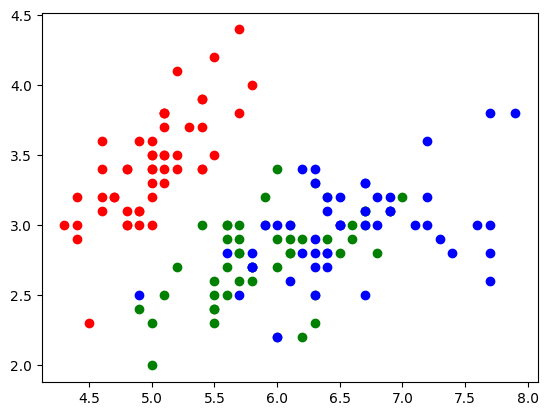

In [109]:
plt.plot(predictors[outputs==0][:,0],predictors[outputs==0][:,1],"ro")
plt.plot(predictors[outputs==1][:,0],predictors[outputs==1][:,1],"go")
plt.plot(predictors[outputs==2][:,0],predictors[outputs==2][:,1],"bo")
plt.savefig("iris.pdf")

In [117]:
k=5; filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h=0.1

In [118]:
(xx,yy,prediction_grid)=make_prediction_grid(predictors, outcomes, limits, h, k)

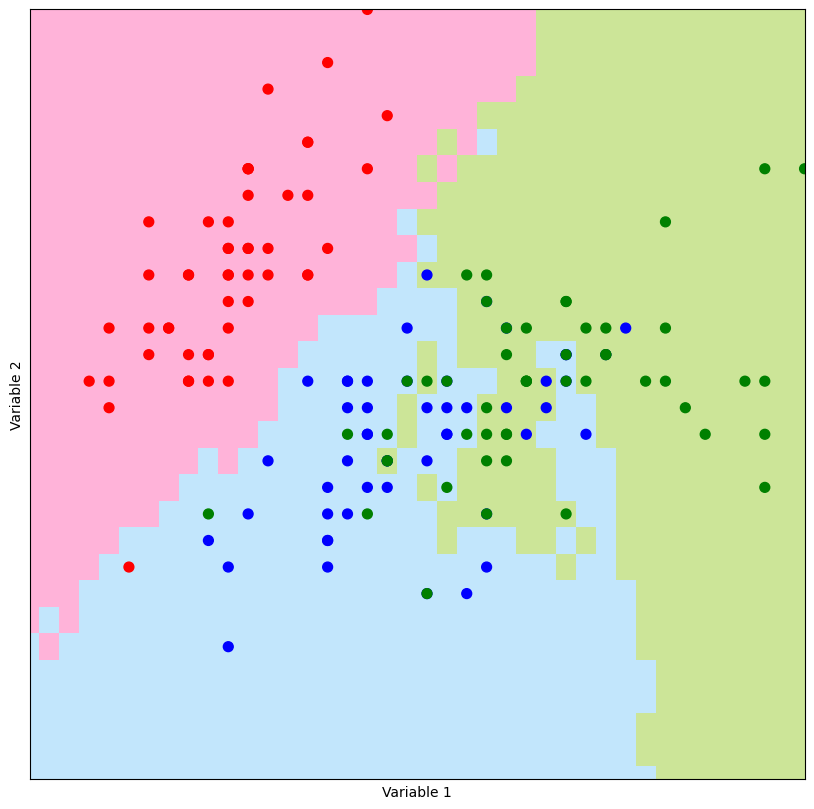

In [119]:
plot_prediction_grid(xx,yy,prediction_grid,filename)

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn=KNeighborsClassifier(n_neighbors=5)

In [122]:
knn.fit(predictors,outcomes)

KNeighborsClassifier()

In [123]:
sk_predictions=knn.predict(predictors)

In [124]:
sk_predictions.shape

(150,)

In [125]:
my_predictions=np.array([knn_predict(p,predictors,outcomes,5) for p in predictors])

In [126]:
my_predictions.shape

(150,)

In [128]:
print(100*np.mean(sk_predictions==my_predictions))

97.33333333333334


In [129]:
print(100*np.mean(sk_predictions==outcomes))

83.33333333333334


In [130]:
print(100*np.mean(my_predictions==outcomes))

84.66666666666667
